# Perform Facial Recognition with Deep Learning in Keras Using CNN | Chaitanya GNB

# Description

Facial recognition is a biometric alternative that measures unique characteristics of a human face. Applications available today include flight check in, tagging friends and family members in photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a face recognition programme with deep convolutional neural networks.

# Objective: 

Use a deep convolutional neural network to perform facial recognition using Keras.

# Dataset Details:

ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images per person. The images were taken at different times, lighting and facial expressions. The faces are in an upright position in frontal view, with a slight left-right rotation.

Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0

# Steps to be followed:

1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

        i. Convolutional Layer
        ii. Pooling Layer
        iii. Fully Connected Layer

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

In [3]:
# Input the required libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from keras.utils import np_utils
import itertools

In [4]:
# Load the dataset after loading the dataset, you have to normalize every image.
data = np.load('ORL_faces.npz') 

x_train = data['trainX']
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

y_train= data['trainY']
y_test= data['testY']

# show the format of train and test Data
print('x_train : {}'.format(x_train[:]))
print('Y_train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y_train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

In [5]:
# Split the dataset
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train, test_size=0.1, random_state=999919)

In [8]:
# Transform the images to equal sizes to feed in CNN
im_rows = 112
im_cols = 92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_val = x_val.reshape(x_val.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape[0]))
print('x_test shape: {}'.format(x_test.shape))
print('x_val shape: {}'.format(x_val.shape))

x_train shape: 216
x_test shape: (160, 112, 92, 1)
x_val shape: (24, 112, 92, 1)


In [9]:
# Build a CNN model that has 3 main layers: i. Convolutional Layer, ii. Pooling Layer,iii. Fully Connected Layer

convolutional_model= Sequential([
                       Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
                       MaxPooling2D(pool_size=2),
                       Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
                       MaxPooling2D(pool_size=2),
                       Flatten(),
                       Dense(2024, activation='relu'),
                       Dropout(0.5),
                       Dense(1024, activation='relu'),
                       Dropout(0.5),
                       Dense(512, activation='relu'),
                       Dropout(0.5),
                       Dense(20, activation='softmax')  
                       ])

convolutional_model.compile(
                    loss='sparse_categorical_crossentropy',
                    optimizer=Adam(lr=0.0001),
                    metrics=['accuracy']
)

In [10]:
# model parameters
convolutional_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 2024)              49841000  
_________________________________________________________________
dropout (Dropout)            (None, 2024)              0

In [11]:
# Train the model

train_face = convolutional_model.fit(np.array(x_train), 
                                     np.array(y_train), 
                                     batch_size=512, 
                                     epochs=300, 
                                     verbose=2, 
                                     validation_data=(np.array(x_val),np.array(y_val)),
                                     )

Epoch 1/300
1/1 - 7s - loss: 3.0055 - accuracy: 0.0694 - val_loss: 2.9926 - val_accuracy: 0.0000e+00
Epoch 2/300
1/1 - 3s - loss: 3.0137 - accuracy: 0.0556 - val_loss: 3.0051 - val_accuracy: 0.0000e+00
Epoch 3/300
1/1 - 3s - loss: 3.0329 - accuracy: 0.0556 - val_loss: 3.0152 - val_accuracy: 0.0000e+00
Epoch 4/300
1/1 - 3s - loss: 3.0161 - accuracy: 0.0694 - val_loss: 3.0184 - val_accuracy: 0.0417
Epoch 5/300
1/1 - 3s - loss: 3.0311 - accuracy: 0.0509 - val_loss: 3.0154 - val_accuracy: 0.0417
Epoch 6/300
1/1 - 3s - loss: 3.0166 - accuracy: 0.0880 - val_loss: 3.0112 - val_accuracy: 0.0417
Epoch 7/300
1/1 - 3s - loss: 2.9797 - accuracy: 0.0833 - val_loss: 3.0103 - val_accuracy: 0.0417
Epoch 8/300
1/1 - 3s - loss: 2.9912 - accuracy: 0.0509 - val_loss: 3.0081 - val_accuracy: 0.0000e+00
Epoch 9/300
1/1 - 3s - loss: 2.9962 - accuracy: 0.0926 - val_loss: 3.0048 - val_accuracy: 0.0000e+00
Epoch 10/300
1/1 - 3s - loss: 2.9823 - accuracy: 0.0648 - val_loss: 2.9996 - val_accuracy: 0.0000e+00
Epoch

Epoch 85/300
1/1 - 4s - loss: 0.4620 - accuracy: 0.8889 - val_loss: 0.3362 - val_accuracy: 0.9167
Epoch 86/300
1/1 - 4s - loss: 0.5100 - accuracy: 0.8472 - val_loss: 0.3144 - val_accuracy: 0.9167
Epoch 87/300
1/1 - 4s - loss: 0.4814 - accuracy: 0.8241 - val_loss: 0.2942 - val_accuracy: 0.9167
Epoch 88/300
1/1 - 4s - loss: 0.3622 - accuracy: 0.8981 - val_loss: 0.2723 - val_accuracy: 0.9167
Epoch 89/300
1/1 - 4s - loss: 0.4525 - accuracy: 0.8704 - val_loss: 0.2581 - val_accuracy: 0.9167
Epoch 90/300
1/1 - 4s - loss: 0.3311 - accuracy: 0.9167 - val_loss: 0.2456 - val_accuracy: 0.9167
Epoch 91/300
1/1 - 4s - loss: 0.3691 - accuracy: 0.9120 - val_loss: 0.2302 - val_accuracy: 0.9167
Epoch 92/300
1/1 - 4s - loss: 0.3700 - accuracy: 0.9074 - val_loss: 0.2283 - val_accuracy: 0.9167
Epoch 93/300
1/1 - 4s - loss: 0.3099 - accuracy: 0.9259 - val_loss: 0.2205 - val_accuracy: 0.9167
Epoch 94/300
1/1 - 4s - loss: 0.3402 - accuracy: 0.9074 - val_loss: 0.2031 - val_accuracy: 0.9167
Epoch 95/300
1/1 - 4

Epoch 168/300
1/1 - 4s - loss: 0.0475 - accuracy: 0.9907 - val_loss: 0.0431 - val_accuracy: 0.9583
Epoch 169/300
1/1 - 4s - loss: 0.0460 - accuracy: 0.9907 - val_loss: 0.0435 - val_accuracy: 0.9583
Epoch 170/300
1/1 - 4s - loss: 0.0359 - accuracy: 0.9907 - val_loss: 0.0443 - val_accuracy: 0.9583
Epoch 171/300
1/1 - 4s - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9583
Epoch 172/300
1/1 - 4s - loss: 0.0356 - accuracy: 0.9861 - val_loss: 0.0465 - val_accuracy: 0.9583
Epoch 173/300
1/1 - 4s - loss: 0.0346 - accuracy: 0.9954 - val_loss: 0.0445 - val_accuracy: 0.9583
Epoch 174/300
1/1 - 4s - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.0427 - val_accuracy: 0.9583
Epoch 175/300
1/1 - 4s - loss: 0.0487 - accuracy: 0.9861 - val_loss: 0.0414 - val_accuracy: 0.9583
Epoch 176/300
1/1 - 4s - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.0400 - val_accuracy: 0.9583
Epoch 177/300
1/1 - 4s - loss: 0.0288 - accuracy: 0.9954 - val_loss: 0.0378 - val_accuracy: 0.9583
Epoch 178/

Epoch 251/300
1/1 - 4s - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 252/300
1/1 - 4s - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 253/300
1/1 - 4s - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 254/300
1/1 - 4s - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 255/300
1/1 - 4s - loss: 0.0206 - accuracy: 0.9907 - val_loss: 0.0255 - val_accuracy: 1.0000
Epoch 256/300
1/1 - 4s - loss: 0.0265 - accuracy: 0.9954 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 257/300
1/1 - 4s - loss: 0.0149 - accuracy: 0.9954 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 258/300
1/1 - 4s - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 259/300
1/1 - 4s - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 260/300
1/1 - 4s - loss: 0.0244 - accuracy: 0.9907 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 261/

In [12]:
# Evaluate test data
face_score = convolutional_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(face_score[0]))
print('test acc {:.4f}'.format(face_score[1]))

test los 0.3959
test acc 0.9375


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


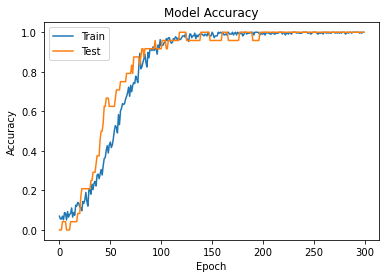

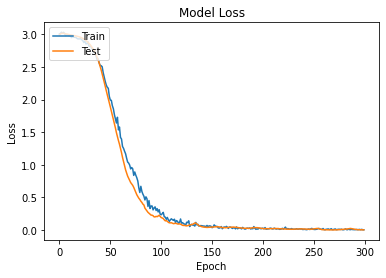

In [15]:
# Plot the result

print(train_face.history.keys())

plt.plot(train_face.history['accuracy'])
plt.plot(train_face.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(train_face.history['loss'])
plt.plot(train_face.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
# Predict and find Accuracy

predicted = np.array(convolutional_model.predict(x_test))
y_new = convolutional_model.predict_classes(x_test)

accuracy = accuracy_score(y_test, y_new)
print("accuracy : ")
print(accuracy)

accuracy : 
0.9375
